<a href="https://colab.research.google.com/github/hackmashine/ml-ds-learning-journey/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from lightgbm import LGBMClassifier

df = pd.read_csv("/content/sample_data/weatherAUS_rainfall_prediction_dataset_cleaned.csv")



# 2. Кодирование категориальных признаков
categorical_cols = ["Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"]
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Целевая переменная
df["RainTomorrow"] = (df["RainTomorrow"] == "Yes").astype(int)

# 3. Train-test split
X = df.drop(columns=["Date", "RainTomorrow"])
y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Масштабирование
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Модель LightGBM
model = LGBMClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)

# 6. Оценка
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


[LightGBM] [Info] Number of positive: 25502, number of negative: 90866
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2665
[LightGBM] [Info] Number of data points in the train set: 116368, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.93      0.81      0.87     22717
           1       0.54      0.79      0.64      6375

    accuracy                           0.80     29092
   macro avg       0.73      0.80      0.75     29092
weighted avg       0.85      0.80      0.82     29092

ROC-AUC: 0.8848657695239033
Confusion Matrix:
 [[18339  4378]
 [ 1335  5040]]


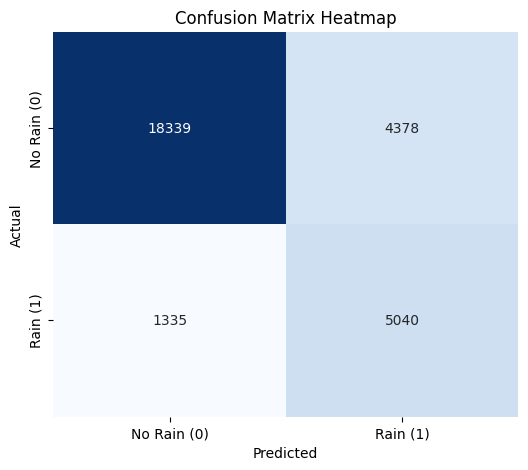

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Твои предсказания и y_test уже есть, допустим:
# y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Rain (0)", "Rain (1)"],
            yticklabels=["No Rain (0)", "Rain (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
